In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
train=pd.read_excel(r"C:\Users\cdileepkumar\Documents\01 Project\BIS\ML_Code\TS_Train.xlsx")
train.head()

,LINK_ID,DATE_TIME,SPEED
0,44641,16/08/2019 12:05:00.000000000 AM,65
1,44641,16/08/2019 12:10:00.000000000 AM,66
2,44641,16/08/2019 12:15:00.000000000 AM,66
3,44641,16/08/2019 12:20:00.000000000 AM,68
4,44641,16/08/2019 12:25:00.000000000 AM,68


In [111]:
#train.drop(['DATE_TIME'],axis=1,inplace=True)

In [123]:
train

,LINK_ID,DATE_TIME,SPEED
0,44641,16/08/2019 12:05:00.000000000 AM,65
1,44641,16/08/2019 12:10:00.000000000 AM,66
2,44641,16/08/2019 12:15:00.000000000 AM,66
3,44641,16/08/2019 12:20:00.000000000 AM,68
4,44641,16/08/2019 12:25:00.000000000 AM,68
...,...,...,...
6472,45137,16/08/2019 11:35:00.000000000 PM,78
6473,45137,16/08/2019 11:40:00.000000000 PM,79
6474,45137,16/08/2019 11:45:00.000000000 PM,77
6475,45137,16/08/2019 11:50:00.000000000 PM,76


In [124]:
train.corr()

,LINK_ID,SPEED
LINK_ID,1.000000,0.005547
SPEED,0.005547,1.000000


In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 3 columns):
LINK_ID      6477 non-null int64
DATE_TIME    6477 non-null object
SPEED        6477 non-null int64
dtypes: int64(2), object(1)
memory usage: 151.9+ KB


In [126]:
train['SPEED'].value_counts()

68     508
59     380
67     257
65     254
69     251
      ... 
105      1
102      1
11       1
99       1
6        1
Name: SPEED, Length: 99, dtype: int64

In [12]:
train['SPEED'].isnull().value_counts()

False    6477
Name: SPEED, dtype: int64

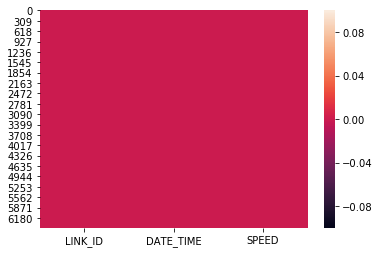

In [14]:
sns.heatmap(train.isnull())

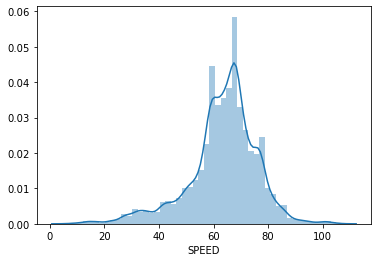

In [127]:
sns.distplot(train['SPEED'])

In [22]:
train['LINK_ID'].isnull().value_counts()

False    6477
Name: LINK_ID, dtype: int64

In [28]:
train['DATE_TIME'].isnull().value_counts()

False    6477
Name: DATE_TIME, dtype: int64

In [128]:
train['DATE_TIME']=pd.to_datetime(train['DATE_TIME'])
train.dtypes

LINK_ID               int64
DATE_TIME    datetime64[ns]
SPEED                 int64
dtype: object

In [129]:
train['year']=train['DATE_TIME'].dt.year 
train['month']=train['DATE_TIME'].dt.month 
train['day']=train['DATE_TIME'].dt.day
train['Hour'] = train['DATE_TIME'].dt.hour 
train['minute'] = train['DATE_TIME'].dt.minute 
train.drop(['DATE_TIME'],axis=1,inplace=True)

In [130]:
train.head()

,LINK_ID,SPEED,year,month,day,Hour,minute
0,44641,65,2019,8,16,0,5
1,44641,66,2019,8,16,0,10
2,44641,66,2019,8,16,0,15
3,44641,68,2019,8,16,0,20
4,44641,68,2019,8,16,0,25


In [131]:
train.drop(['year','month','day'],axis=1,inplace=True)

In [133]:
train

,LINK_ID,SPEED,Hour,minute
0,44641,65,0,5
1,44641,66,0,10
2,44641,66,0,15
3,44641,68,0,20
4,44641,68,0,25
...,...,...,...,...
6472,45137,78,23,35
6473,45137,79,23,40
6474,45137,77,23,45
6475,45137,76,23,50


In [134]:
train.corr()

,LINK_ID,SPEED,Hour,minute
LINK_ID,1.000000,0.005547,-0.007925,-0.002749
SPEED,0.005547,1.000000,-0.296620,0.018355
Hour,-0.007925,-0.296620,1.000000,0.006223
minute,-0.002749,0.018355,0.006223,1.000000


In [94]:
x_train=train[['LINK_ID']]
y_train=train[['SPEED']]

x_train.head()
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [99]:
x_train
y_train

,SPEED
0,65
1,66
2,66
3,68
4,68
...,...
6472,78
6473,79
6474,77
6475,76


In [85]:
##Testing...
test=pd.read_excel(r"C:\Users\cdileepkumar\Documents\01 Project\BIS\ML_Code\EMAS_TEST.xlsx")

test.head()

,LINK_ID,TIME_STAMP,AVERAGE_SPEED
0,44672,16/08/2019 06:25:00.000000000 AM,77
1,44672,16/08/2019 05:10:00.000000000 AM,75
2,44672,16/08/2019 11:05:00.000000000 PM,75
3,44672,16/08/2019 09:35:00.000000000 AM,75
4,44672,16/08/2019 06:15:00.000000000 AM,77


In [86]:
test['TIME_STAMP']=pd.to_datetime(test['TIME_STAMP'])

In [87]:
test['year']=test['TIME_STAMP'].dt.year 
test['month']=test['TIME_STAMP'].dt.month 
test['day']=test['TIME_STAMP'].dt.day
test['Hour'] = test['TIME_STAMP'].dt.hour 
test['minute'] = test['TIME_STAMP'].dt.minute 
test.head()

,LINK_ID,TIME_STAMP,AVERAGE_SPEED,year,month,day,Hour,minute
0,44672,2019-08-16 06:25:00,77,2019,8,16,6,25
1,44672,2019-08-16 05:10:00,75,2019,8,16,5,10
2,44672,2019-08-16 23:05:00,75,2019,8,16,23,5
3,44672,2019-08-16 09:35:00,75,2019,8,16,9,35
4,44672,2019-08-16 06:15:00,77,2019,8,16,6,15


In [88]:
test.drop(['TIME_STAMP'],axis=1,inplace=True)

In [89]:
test=test.rename(columns={'AVERAGE_SPEED':'SPEED'})
test

,LINK_ID,SPEED,year,month,day,Hour,minute
0,44672,77,2019,8,16,6,25
1,44672,75,2019,8,16,5,10
2,44672,75,2019,8,16,23,5
3,44672,75,2019,8,16,9,35
4,44672,77,2019,8,16,6,15
...,...,...,...,...,...,...,...
3260,44684,75,2019,8,16,23,40
3261,45094,63,2019,8,16,4,35
3262,45094,63,2019,8,16,20,0
3263,44684,80,2019,8,16,3,50


In [90]:
train.head()

,LINK_ID,SPEED,year,month,day,Hour,minute
0,44641,65,2019,8,16,0,5
1,44641,66,2019,8,16,0,10
2,44641,66,2019,8,16,0,15
3,44641,68,2019,8,16,0,20
4,44641,68,2019,8,16,0,25


In [71]:
test.head()

,LINK_ID,SPEED,year,month,day,Hour,minute
0,44672,77,2019,8,16,6,25
1,44672,75,2019,8,16,5,10
2,44672,75,2019,8,16,23,5
3,44672,75,2019,8,16,9,35
4,44672,77,2019,8,16,6,15


In [100]:
xtest=test[['LINK_ID']]
ytest=test[['SPEED']]

# Predicting the Test set results.
y_pred=regressor.predict(xtest)
y_pred

array([[63.33597233],
       [63.33597233],
       [63.33597233],
       ...,
       [63.48685751],
       [63.3402629 ],
       [63.3402629 ]])

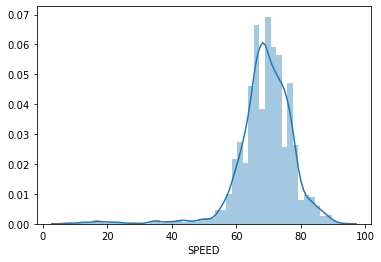

In [117]:
sns.distplot(test['SPEED'])

In [118]:
train

,LINK_ID,SPEED
0,44641,65
1,44641,66
2,44641,66
3,44641,68
4,44641,68
...,...,...
6472,45137,78
6473,45137,79
6474,45137,77
6475,45137,76


In [97]:
#Metrics
from sklearn.metrics import r2_score
score=r2_score(y_pred,ytest)
print(score)

-23166.273464979287
